# Introduction

King County is a beautiful and romantic county in the United States, even though there is a lot of rain. With the increasing of tech job opportunities in Seattle, more and more people are considering about moving to this county. The population was about 2,233,163 in the 2018 census estimate. According to Zillow, the median home value in King County is $626,665. King County home values have declined -2.1% over the past year and Zillow also predicts they will rise 1.6% within the next year. 

So, if you just got a job offer with a considerable salary, you are probably thinking about moving to Seattle or King county. Before you accept this offer, you might want to know the average house price in each cities of King county and try to explore some interesting venues in this county to help you make this important decision. 


# Data

To approach this topic, we will have following data: 

1. coordinates in each cities of King county to locate the position on the map for further analysis. 
2. king county house values csv file shows average house price by cities.

3. Foursquare API can help to explore various kinds of venues around places.  


# Import

In [343]:
import pandas as pd
import numpy as np

In [344]:
hp = pd.read_excel('king-county-wa_avg_house_price.xls')
city = pd.read_csv('uscities.csv')

select state_id  == WA only

In [345]:
city = city[city['state_id'] == 'WA']

In [346]:

c = city[['city','lat','lng','population','density']]
c.rename(columns = {'city': 'City', 'lat': 'Lat','lng':'Lng','population': 'Population','density': 'Density'},inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [347]:
hp = hp[['Region Name','Average Home Price']]
hp.rename(columns = {'Region Name': 'City'},inplace = True)

# Data Cleaning

In [348]:
hp.info()
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
City                  43 non-null object
Average Home Price    43 non-null float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 5 columns):
City          620 non-null object
Lat           620 non-null float64
Lng           620 non-null float64
Population    620 non-null float64
Density       620 non-null float64
dtypes: float64(4), object(1)
memory usage: 29.1+ KB


# Data Preparation

In [349]:
df = hp.join(c.set_index('City'),on = 'City')
print('The data frame has {} cities'.format(len(df['City'].unique())))

The data frame has 43 cities


In [350]:
df = df.dropna(axis =0,how = 'any',thresh = None,subset=None,inplace = False)
df

,City,Average Home Price,Lat,Lng,Population,Density
0,Algona,2.432883e+05,47.2822,-122.2504,3185.0,933.0
1,Auburn,2.872033e+05,47.3041,-122.2110,80776.0,1057.0
2,Beaux Arts Village,1.413122e+06,47.5854,-122.2009,326.0,1524.0
3,Bellevue,6.713283e+05,47.5953,-122.1550,144444.0,1666.0
4,Black Diamond,3.513033e+05,47.3130,-122.0181,4436.0,262.0
5,Bothell,4.604383e+05,47.7736,-122.2044,45533.0,1287.0
6,Bryn Mawr-Skyway,3.407217e+05,47.4949,-122.2411,18365.0,2500.0
7,Burien,3.216875e+05,47.4762,-122.3393,51671.0,1983.0
8,Carnation,4.890167e+05,47.6446,-121.9048,2164.0,725.0
9,Clyde Hill,1.957412e+06,47.6303,-122.2180,3318.0,1213.0


In [351]:
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


Use geopy library to get lat and lng values of King county

In [352]:
address = 'seattle, United States'

geolocator = Nominatim(user_agent = "seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of Toronto City are {}, {}.".format(latitude,longitude))


The geographical coordinates of Toronto City are 47.6038321, -122.3300624.


Create a map of King County with cities superimposed on top

In [354]:
map_king = folium.Map(location = [latitude,longitude], zoom_start = 10)

In [355]:
# Create map of Seattle using the latitude and longitude values
map_king = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add markers to the map

for lat, lng, city in zip(df['Lat'], df['Lng'], df['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html =True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_king)

map_king

In [356]:
# The code was removed by Watson Studio for sharing.

# Explore Data in Foursquare API

In [357]:
city_name = df.loc[0,'City']
city_lat = df.loc[0,'Lat']
city_lng = df.loc[0,'Lng']
print('Latitude and longitude values of {} are {},{}.'.format(city_name,city_lat,city_lng))

Latitude and longitude values of Algona are 47.2822,-122.2504.


Get the top 100 venues that are in Algona with a radium of 500 meters

In [358]:
LIMIT = 100
RADIUS = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        Client_Id,
        Client_pass,
        version,
        city_lat,
        city_lng,
        RADIUS,
        LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DHCRXMAEYL1HNQDYZNZ5YHSKTY5JOYI34OKQ453UJ3UUKTXZ&client_secret=PJ54QOY4TYUWR23ZVAYGYFCIVQ2WNF1KP4RHG2OY3DRYPQAV&v=20191224&ll=47.2822,-122.2504&radius=500&limit=100'

In [359]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0bdbd6963d29001b040937'},
 'response': {'headerLocation': 'Algona',
  'headerFullLocation': 'Algona',
  'headerLocationGranularity': 'city',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 47.286700004500005,
    'lng': -122.24377900612292},
   'sw': {'lat': 47.2776999955, 'lng': -122.25702099387708}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f32b52519836c91c7f1db77',
       'name': 'Tacos El Tajin',
       'location': {'address': '400 1st Ave N',
        'lat': 47.27895305829924,
        'lng': -122.24982466092685,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.27895305829924,
          'lng': -122.24982466092685}],
        'distance': 364,
        'postalCode': '98001',
        'cc': 'US',
   

In [239]:
results['response']

{'headerLocation': 'Algona',
 'headerFullLocation': 'Algona',
 'headerLocationGranularity': 'city',
 'totalResults': 6,
 'suggestedBounds': {'ne': {'lat': 47.286700004500005,
   'lng': -122.24377900612292},
  'sw': {'lat': 47.2776999955, 'lng': -122.25702099387708}},
 'groups': [{'type': 'Recommended Places',
   'name': 'recommended',
   'items': [{'reasons': {'count': 0,
      'items': [{'summary': 'This spot is popular',
        'type': 'general',
        'reasonName': 'globalInteractionReason'}]},
     'venue': {'id': '4f32b52519836c91c7f1db77',
      'name': 'Tacos El Tajin',
      'location': {'address': '400 1st Ave N',
       'lat': 47.27895305829924,
       'lng': -122.24982466092685,
       'labeledLatLngs': [{'label': 'display',
         'lat': 47.27895305829924,
         'lng': -122.24982466092685}],
       'distance': 364,
       'postalCode': '98001',
       'cc': 'US',
       'city': 'Algona',
       'state': 'WA',
       'country': 'United States',
       'formattedAddre

In [240]:
results['response']['groups']

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4f32b52519836c91c7f1db77',
     'name': 'Tacos El Tajin',
     'location': {'address': '400 1st Ave N',
      'lat': 47.27895305829924,
      'lng': -122.24982466092685,
      'labeledLatLngs': [{'label': 'display',
        'lat': 47.27895305829924,
        'lng': -122.24982466092685}],
      'distance': 364,
      'postalCode': '98001',
      'cc': 'US',
      'city': 'Algona',
      'state': 'WA',
      'country': 'United States',
      'formattedAddress': ['400 1st Ave N',
       'Algona, WA 98001',
       'United States']},
     'categories': [{'id': '4d4b7105d754a06374d81259',
       'name': 'Food',
       'pluralName': 'Food',
       'shortName': 'Food',
       'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      

In [241]:
results['response']['groups'][0]

{'type': 'Recommended Places',
 'name': 'recommended',
 'items': [{'reasons': {'count': 0,
    'items': [{'summary': 'This spot is popular',
      'type': 'general',
      'reasonName': 'globalInteractionReason'}]},
   'venue': {'id': '4f32b52519836c91c7f1db77',
    'name': 'Tacos El Tajin',
    'location': {'address': '400 1st Ave N',
     'lat': 47.27895305829924,
     'lng': -122.24982466092685,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.27895305829924,
       'lng': -122.24982466092685}],
     'distance': 364,
     'postalCode': '98001',
     'cc': 'US',
     'city': 'Algona',
     'state': 'WA',
     'country': 'United States',
     'formattedAddress': ['400 1st Ave N',
      'Algona, WA 98001',
      'United States']},
    'categories': [{'id': '4d4b7105d754a06374d81259',
      'name': 'Food',
      'pluralName': 'Food',
      'shortName': 'Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'p

In [242]:
results['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4f32b52519836c91c7f1db77',
   'name': 'Tacos El Tajin',
   'location': {'address': '400 1st Ave N',
    'lat': 47.27895305829924,
    'lng': -122.24982466092685,
    'labeledLatLngs': [{'label': 'display',
      'lat': 47.27895305829924,
      'lng': -122.24982466092685}],
    'distance': 364,
    'postalCode': '98001',
    'cc': 'US',
    'city': 'Algona',
    'state': 'WA',
    'country': 'United States',
    'formattedAddress': ['400 1st Ave N',
     'Algona, WA 98001',
     'United States']},
   'categories': [{'id': '4d4b7105d754a06374d81259',
     'name': 'Food',
     'pluralName': 'Food',
     'shortName': 'Food',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4f32b5251983

In [360]:
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4f32b52519836c91c7f1db77-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f32b52519836c91c7f1db77,Tacos El Tajin,400 1st Ave N,47.278953,-122.249825,"[{'label': 'display', 'lat': 47.27895305829924...",364,98001,US,Algona,WA,United States,"[400 1st Ave N, Algona, WA 98001, United States]","[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",0,[]
1,e-0-5d848e3f50386c00098615f7-1,0,"[{'summary': 'This spot is popular', 'type': '...",5d848e3f50386c00098615f7,Kornerstone Security,333 5th Ave N,47.284083,-122.250233,"[{'label': 'display', 'lat': 47.2840826, 'lng'...",209,98001,US,Algona,WA,United States,"[333 5th Ave N, Algona, WA 98001, United States]","[{'id': '545419b1498ea6ccd0202f58', 'name': 'H...",0,[]
2,e-0-57da49b7498e51eb455898ae-2,0,"[{'summary': 'This spot is popular', 'type': '...",57da49b7498e51eb455898ae,XFINITY Store by Comcast,316 1st Ave N,47.280495,-122.248703,"[{'label': 'display', 'lat': 47.28049548501462...",228,98001,US,Algona,WA,United States,"[316 1st Ave N, Algona, WA 98001, United States]","[{'id': '5453de49498eade8af355881', 'name': 'B...",0,[]
3,e-0-4b7792e2f964a5203aa22ee3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b7792e2f964a5203aa22ee3,Coco Joe's Tiki Bar & Grill,305 1st Ave N,47.279415,-122.250873,"[{'label': 'display', 'lat': 47.27941479595586...",312,98001,US,Algona,WA,United States,"[305 1st Ave N, Algona, WA 98001, United States]","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[]
4,e-0-4dfa6c231f6e2728c9f29b04-4,0,"[{'summary': 'This spot is popular', 'type': '...",4dfa6c231f6e2728c9f29b04,Valley Mart,NaN,47.278898,-122.250172,"[{'label': 'display', 'lat': 47.278898, 'lng':...",367,NaN,US,Algona,WA,United States,"[Algona, WA, United States]","[{'id': '4d954b0ea243a5684a65b473', 'name': 'C...",0,[]


In [361]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_Id, 
            Client_pass, 
            version, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'] 
    return(nearby_venues)
    

In [267]:
seattle_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Lat'],
                                   longitudes=df['Lng'],
                                  )
seattle_venues

Algona
Auburn
Beaux Arts Village
Bellevue
Black Diamond
Bothell
Bryn Mawr-Skyway
Burien
Carnation
Clyde Hill
Covington
Des Moines
Duvall
Enumclaw
Fall City
Federal Way
Hunts Point
Issaquah
Kenmore
Kent
Kirkland
Lake Forest Park
Maple Valley
Medina
Mercer Island
Milton
Newcastle
Normandy Park
North Bend
Pacific
Ravensdale
Redmond
Renton
Sammamish
Seattle
Shoreline
Snoqualmie
Tukwila
Vashon
White Center
Woodinville
Yarrow Point


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Algona,47.2822,-122.2504,Tacos El Tajin,47.278953,-122.249825,Food
1,Algona,47.2822,-122.2504,Kornerstone Security,47.284083,-122.250233,Home Service
2,Algona,47.2822,-122.2504,XFINITY Store by Comcast,47.280495,-122.248703,Business Service
3,Algona,47.2822,-122.2504,Coco Joe's Tiki Bar & Grill,47.279415,-122.250873,Bar
4,Algona,47.2822,-122.2504,Valley Mart,47.278898,-122.250172,Convenience Store
...,...,...,...,...,...,...,...
365,Woodinville,47.7569,-122.1477,Bobae Coffee And Tea,47.753193,-122.150540,Bubble Tea Shop
366,Woodinville,47.7569,-122.1477,Sprint Store By Arch Telecom,47.758343,-122.153751,Mobile Phone Shop
367,Woodinville,47.7569,-122.1477,WW (Weight Watchers),47.758343,-122.153751,Weight Loss Center
368,Yarrow Point,47.6452,-122.2179,Morningside Park,47.646850,-122.213710,Park


In [362]:
seattle_venues.shape

(370, 7)

In [363]:

summary = seattle_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary

,Neighborhood,Count
0,Kirkland,1
1,Auburn,1
2,Ravensdale,1
3,Pacific,1
4,Black Diamond,1
5,Milton,1
6,Hunts Point,1
7,Yarrow Point,2
8,Beaux Arts Village,2
9,Carnation,3


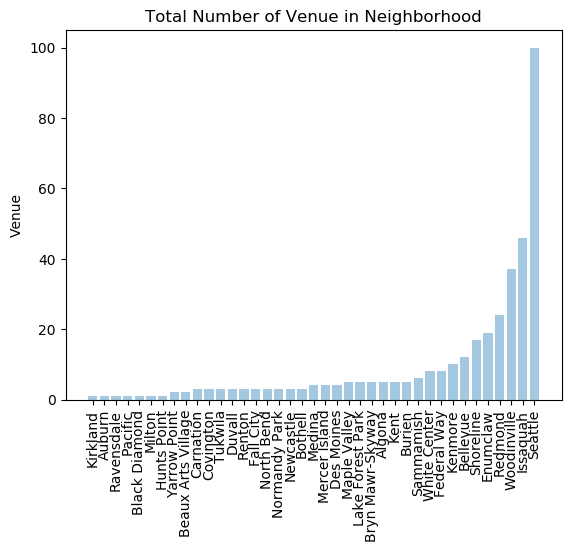

In [364]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Neighborhood')
plt.xticks(rotation=90)

plt.show()

In [365]:
seattle_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Algona,5,5,5,5,5,5
Auburn,1,1,1,1,1,1
Beaux Arts Village,2,2,2,2,2,2
Bellevue,12,12,12,12,12,12
Black Diamond,1,1,1,1,1,1
Bothell,3,3,3,3,3,3
Bryn Mawr-Skyway,5,5,5,5,5,5
Burien,5,5,5,5,5,5
Carnation,3,3,3,3,3,3


In [366]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 152 uniques categories.


# Analyze Each Neighborhood

In [367]:
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()
seattle_onehot.shape

(370, 153)

In [372]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped

,Neighborhood,ATM,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,...,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Watch Shop,Weight Loss Center,Wine Shop,Yoga Studio
0,Algona,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Auburn,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,1.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Beaux Arts Village,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Bellevue,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Black Diamond,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,1.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Bothell,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Bryn Mawr-Skyway,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.20,0.000000,0.000000,0.000000,0.000000
7,Burien,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.200000,0.000000,0.000000
8,Carnation,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Covington,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.0,...,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


Print each neighborhood along with the top 5 most common venues

In [373]:
num_top_venues = 5

for hood in seattle_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algona----
               venue  freq
0  Convenience Store   0.2
1                Bar   0.2
2               Food   0.2
3   Business Service   0.2
4       Home Service   0.2


----Auburn----
                     venue  freq
0            Train Station   1.0
1                     Pier   0.0
2               Nail Salon   0.0
3  New American Restaurant   0.0
4           Nightlife Spot   0.0


----Beaux Arts Village----
                     venue  freq
0                    Beach   0.5
1               Playground   0.5
2                      ATM   0.0
3                     Pier   0.0
4  New American Restaurant   0.0


----Bellevue----
           venue  freq
0    Coffee Shop  0.08
1  Tanning Salon  0.08
2   Home Service  0.08
3    Gas Station  0.08
4   Fishing Spot  0.08


----Black Diamond----
                     venue  freq
0       Athletics & Sports   1.0
1                      ATM   0.0
2              Pizza Place   0.0
3  New American Restaurant   0.0
4           Nightlife Spot   0.0




In [374]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [378]:

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Algona,Home Service,Convenience Store,Bar,Food,Business Service,Diner,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run
1,Auburn,Train Station,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Diner,Dim Sum Restaurant
2,Beaux Arts Village,Beach,Playground,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Diner
3,Bellevue,Home Service,Tanning Salon,Gas Station,Japanese Restaurant,Fishing Spot,Park,Pizza Place,Coffee Shop,Sandwich Place,Bus Stop
4,Black Diamond,Athletics & Sports,Dim Sum Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Diner,Yoga Studio
5,Bothell,Park,Brewery,Yoga Studio,Diner,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Dim Sum Restaurant
6,Bryn Mawr-Skyway,Coffee Shop,Casino,Vietnamese Restaurant,Southern / Soul Food Restaurant,Lawyer,Yoga Studio,Dim Sum Restaurant,Eastern European Restaurant,Donut Shop,Dog Run
7,Burien,Middle Eastern Restaurant,Weight Loss Center,Rental Car Location,Mobile Phone Shop,Fast Food Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store
8,Carnation,Park,Theme Park,Theme Park Ride / Attraction,Ethiopian Restaurant,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Diner,Dim Sum Restaurant
9,Covington,Coffee Shop,Baseball Field,Moving Target,Diner,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Discount Store,Dim Sum Restaurant


In [376]:
# set number of clusters
kclusters = 3

seattle_grouped_clustering = seattle_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1], dtype=int32)

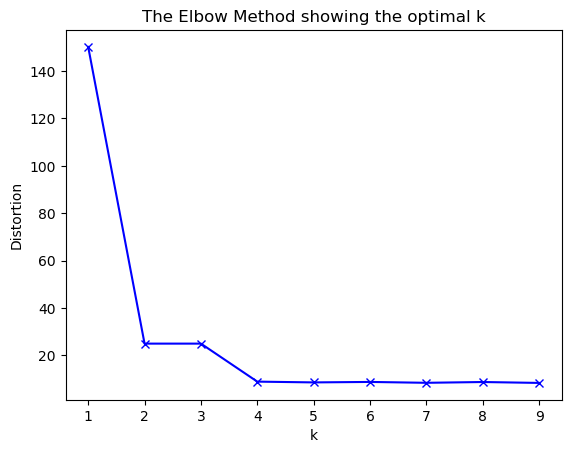

In [377]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(seattle_grouped_clustering)
    kmeanModel.fit(seattle_grouped_clustering)
    distortions.append(sum(np.min(cdist(seattle_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / seattle_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


,City,Average Home Price,Lat,Lng,Population,Density
0,Algona,2.432883e+05,47.2822,-122.2504,3185.0,933.0
1,Auburn,2.872033e+05,47.3041,-122.2110,80776.0,1057.0
2,Beaux Arts Village,1.413122e+06,47.5854,-122.2009,326.0,1524.0
3,Bellevue,6.713283e+05,47.5953,-122.1550,144444.0,1666.0
4,Black Diamond,3.513033e+05,47.3130,-122.0181,4436.0,262.0
5,Bothell,4.604383e+05,47.7736,-122.2044,45533.0,1287.0
6,Bryn Mawr-Skyway,3.407217e+05,47.4949,-122.2411,18365.0,2500.0
7,Burien,3.216875e+05,47.4762,-122.3393,51671.0,1983.0
8,Carnation,4.890167e+05,47.6446,-121.9048,2164.0,725.0
9,Clyde Hill,1.957412e+06,47.6303,-122.2180,3318.0,1213.0


In [331]:
seattle_grouped.columns

Index(['Neighborhood', 'ATM', 'Airport Terminal', 'American Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Arts & Crafts Store',
       'Asian Restaurant', 'Assisted Living', 'Athletics & Sports',
       ...
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object', length=164)

In [336]:

data_process = df.sort_values('Average Home Price').reset_index(drop=True)
data_process = data_process.drop(['Lat', 'Lng'], axis=1)
data_process

,City,Average Home Price,Population,Density
0,Algona,2.432883e+05,3185.0,933.0
1,Pacific,2.639242e+05,7184.0,1149.0
2,Milton,2.704925e+05,8230.0,1185.0
3,Tukwila,2.735375e+05,20144.0,847.0
4,Federal Way,2.853875e+05,96690.0,1679.0
5,Auburn,2.872033e+05,80776.0,1057.0
6,Des Moines,2.954717e+05,31238.0,1875.0
7,Covington,3.039917e+05,20916.0,1363.0
8,Kent,3.072158e+05,128458.0,1470.0
9,White Center,3.127108e+05,15300.0,2614.0


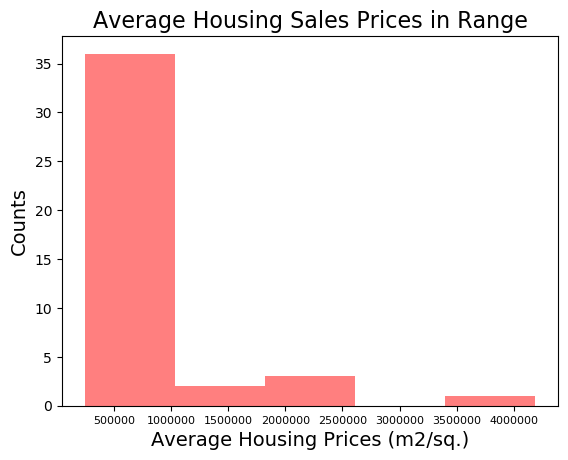

In [380]:

num_bins = 5
n, bins, patches = plt.hist(data_process['Average Home Price'], num_bins, facecolor='red', alpha=0.5)
plt.title("Average Housing Sales Prices in Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0,size = 8)
plt.xlabel('Average Housing Prices (m2/sq.)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [333]:
level = []
for i in range(0,len(data_process)):
    if (data_process['Average Home Price'][i] < 1000000):
        level.append("Low Level HSP")
    elif (data_process['Average Home Price'][i] >= 1000000 and data_process['Average Home Price'][i] < 1700000):
        level.append("Mid-1 Level HSP")
    elif (data_process['Average Home Price'][i] >= 1700000 and data_process['Average Home Price'][i] < 2700000):
        level.append("Mid-2 Level HSP")
    elif (data_process['Average Home Price'][i] >= 2700000 and data_process['Average Home Price'][i] <3500000):
        level.append("High-1 Level HSP")
    else:
        level.append("High-2 Level HSP")   

data_process['Level_labels'] = level
data_process

,City,Average Home Price,Population,Density,Level_labels
0,Algona,2.432883e+05,3185.0,933.0,Low Level HSP
1,Pacific,2.639242e+05,7184.0,1149.0,Low Level HSP
2,Milton,2.704925e+05,8230.0,1185.0,Low Level HSP
3,Tukwila,2.735375e+05,20144.0,847.0,Low Level HSP
4,Federal Way,2.853875e+05,96690.0,1679.0,Low Level HSP
5,Auburn,2.872033e+05,80776.0,1057.0,Low Level HSP
6,Des Moines,2.954717e+05,31238.0,1875.0,Low Level HSP
7,Covington,3.039917e+05,20916.0,1363.0,Low Level HSP
8,Kent,3.072158e+05,128458.0,1470.0,Low Level HSP
9,White Center,3.127108e+05,15300.0,2614.0,Low Level HSP


In [334]:
top3 = seattle_venues.groupby(['Neighborhood','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Neighborhood','Counts'],ascending=False).groupby('Neighborhood').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Neighborhood'])['Join'].apply(", ".join).reset_index()

top3

,Neighborhood,Join
0,Algona,"1 Bar, 1 Business Service, 1 Convenience Store"
1,Auburn,1 Train Station
2,Beaux Arts Village,"1 Beach, 1 Playground"
3,Bellevue,"1 Bus Stop, 1 Chinese Restaurant, 1 Coffee Shop"
4,Black Diamond,1 Athletics & Sports
5,Bothell,"2 Park, 1 Brewery"
6,Bryn Mawr-Skyway,"1 Casino, 1 Coffee Shop, 1 Lawyer"
7,Burien,"1 Fast Food Restaurant, 1 Middle Eastern Resta..."
8,Carnation,"1 Park, 1 Theme Park, 1 Theme Park Ride / Attr..."
9,Covington,"1 Baseball Field, 1 Coffee Shop, 1 Moving Target"


In [388]:
temp=df.groupby('City')
temp

# Result

In [237]:
result = pd.merge(seattle_merged, 
                    top3[['Neighborhood', 'Join']],
                    left_on = 'City',
                    right_on = 'Neighborhood',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['City','Level_labels']],
                    left_on = 'Neighborhood',
                    right_on = 'City',
                    how = 'left')
result = result.drop(['Neighborhood','City_y'], axis=1)
result = result.dropna(axis =0,how = 'any',thresh = None,subset=None,inplace = False)

In [391]:
result.rename(columns = {'City_x':'City','Join': 'Common Venue'},inplace = True)
result

,City,Average Home Price,Lat,Lng,Population,Density,Common Venue,Level_labels
0,Algona,2.432883e+05,47.2822,-122.2504,3185.0,933.0,"1 Bar, 1 Business Service, 1 Convenience Store",Low Level HSP
1,Auburn,2.872033e+05,47.3041,-122.2110,80776.0,1057.0,"1 Pharmacy, 1 Train Station",Low Level HSP
2,Beaux Arts Village,1.413122e+06,47.5854,-122.2009,326.0,1524.0,"1 Beach, 1 Playground",Mid-1 Level HSP
3,Bellevue,6.713283e+05,47.5953,-122.1550,144444.0,1666.0,"1 Bus Stop, 1 Chinese Restaurant, 1 Coffee Shop",Low Level HSP
4,Black Diamond,3.513033e+05,47.3130,-122.0181,4436.0,262.0,1 Athletics & Sports,Low Level HSP
5,Bothell,4.604383e+05,47.7736,-122.2044,45533.0,1287.0,"2 Park, 1 Brewery",Low Level HSP
6,Bryn Mawr-Skyway,3.407217e+05,47.4949,-122.2411,18365.0,2500.0,"1 Casino, 1 Coffee Shop, 1 Hobby Shop",Low Level HSP
7,Burien,3.216875e+05,47.4762,-122.3393,51671.0,1983.0,"1 Fast Food Restaurant, 1 Middle Eastern Resta...",Low Level HSP
8,Carnation,4.890167e+05,47.6446,-121.9048,2164.0,725.0,"1 Disc Golf, 1 Park, 1 Theme Park",Low Level HSP
10,Covington,3.039917e+05,47.3668,-122.1044,20916.0,1363.0,"1 Baseball Field, 1 Home Service",Low Level HSP


# Conclusion

As a result, we can combine the common venue ranking with the average home price, price level, population and density in one data frame to present to the clients who are interested in moving to King County. 

As we all known, living cost and entertainments are always the most two important factors, which might be considered by people are thinking moving to a new city.

For people who has sufficient budget and looking for a high resident environment and community, we will highly recommended that Mercer island, Beaux Arts Village, Clyde Hill, Yarrow Point, Medina and Hunts Point might be the ideal options.

If you would like to have a lively and convenient city life around by various entertainments and restaurants, Seattle must be your top one choice in terms of the our results. After that, Redmond, Sammamish, Issaquah, Bellevue are also very coinvent to live and work. 

However, if you are the person who would like to live quiet and far away from cities. You probably need conduct a further research in Auburn, Kirkland, Pacific and Ravensdale. 

All in all, clients can make individual choice to fit their personalized requirement based on our final report table. 


# References

1.	simplemaps_United Satates Cities Database
2.	King County house sales price by zillow
3.	FourSquare API